In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## Normalize data

In [3]:
X_train = X_train.astype("float32")/X_train.max()
X_test = X_test.astype("float32")/X_train.max()

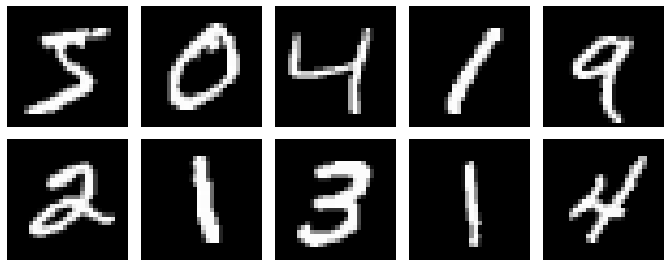

In [7]:
def display_images(data,nrows = 2, ncols =  5, figsize = (12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap = "gray")
        ax.axis('off')

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

## MLP Model

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes= None, names = None, activations = []):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape = (28,28), name = "input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))

    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam")

    return model

model_1 = MLP_model(nodes = [10], names = ['output_layer'], activations=['softmax'])
model_1.summary()
#28x28 -> 784 weights and 1 bias -> 785 * 10 (output nodes) -> 7850

Model: "MLP_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_1.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=0)

In [12]:
metrics = pd.DataFrame(model_1.history.history)
metrics.index = range(len(metrics))
metrics.head()

,loss,val_loss
0,0.502811,0.307878
1,0.316134,0.282700
2,0.292396,0.268841
3,0.281250,0.264143
4,0.273396,0.258946


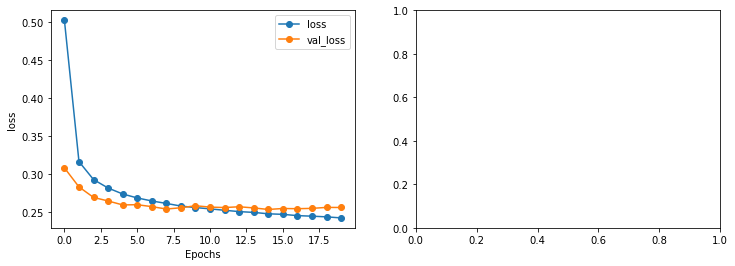

In [13]:
def plot_metrics(df_history, style ='-o'):
    _, axes = plt.subplots(1, 2, figsize = (12,4))
    columns = [['loss', 'val_loss']]
    for ax, col in zip(axes,columns):
        df_history.plot(y= col, xlabel = 'Epochs', ylabel = col[0], ax = ax, style = style)

plot_metrics(metrics)

## Hidden layers

In [15]:
model_2 = MLP_model(nodes = [128,128,10], activations = ['relu', 'relu', 'softmax'], names =['hidden1', 'hidden2', 'output'])
model_2.summary()

Model: "MLP_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               100480    
_________________________________________________________________
hidden2 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_2.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 169us/sample - loss: 0.2532 - val_loss: 0.1259
Epoch 2/20
50000/50000 [==============================] - 8s 160us/sample - loss: 0.1047 - val_loss: 0.1089
Epoch 3/20
50000/50000 [==============================] - 8s 161us/sample - loss: 0.0719 - val_loss: 0.1093
Epoch 4/20
50000/50000 [==============================] - 8s 160us/sample - loss: 0.0543 - val_loss: 0.0941
Epoch 5/20
50000/50000 [==============================] - 8s 158us/sample - loss: 0.0423 - val_loss: 0.0951
Epoch 6/20
50000/50000 [==============================] - 8s 161us/sample - loss: 0.0358 - val_loss: 0.1018
Epoch 7/20
50000/50000 [==============================] - 8s 158us/sample - loss: 0.0307 - val_loss: 0.1193
Epoch 8/20
50000/50000 [==============================] - 8s 161us/sample - loss: 0.0239 - val_loss: 0.1099
Epoch 9/20
50000/50000 [==============================] - 8s 163us/sample - loss: 0.02

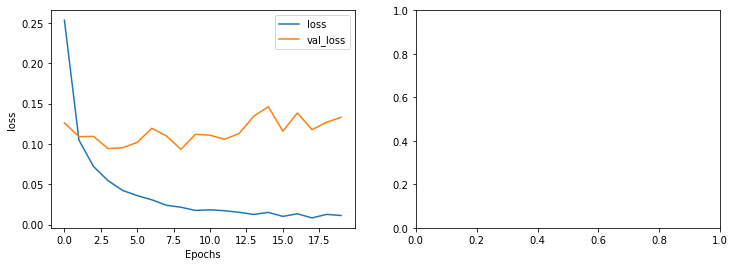

In [17]:
metrics = pd.DataFrame(model_2.history.history)
metrics.index = range(len(metrics))
plot_metrics(metrics, style='-')

In [18]:
model_3 = MLP_model(nodes = [128,128,10], activations = ['relu', 'relu', 'softmax'], names =['hidden1', 'hidden2', 'output'])
model_3.fit(X_train, y_train, epochs=5, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2232
Epoch 2/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0927
Epoch 3/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0657
Epoch 4/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0505
Epoch 5/5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0415


## Prediction and evaluation

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



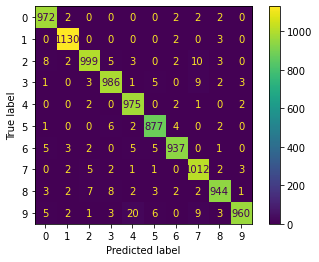

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_3.predict(X_test)
y_pred = np.argmax(y_pred, axis =1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))

## Missclassification

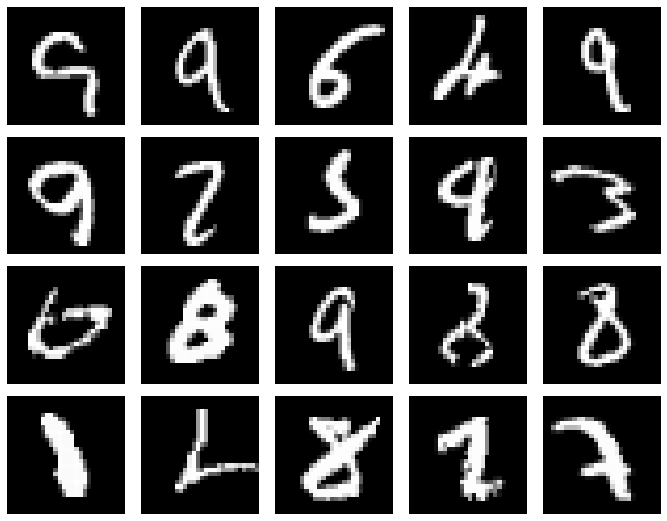

In [21]:
missclassified_indices = np.where(y_pred != y_test)
missclassified_samples = X_test[missclassified_indices]

display_images(missclassified_samples,4,5,(12,8))